In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib 
import sounddevice as sd 
from scipy.io import wavfile 
from scipy import signal
from pydub import AudioSegment

c:\VSCodeProjects\TimeSeries\.venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
samplerate, data = wavfile.read("./Alesis-Fusion-English-Horn-C5.wav")

duration = len(data)/samplerate 
time = np.arange(0,duration,1/samplerate)

C:\Users\kufuk\AppData\Local\Temp\ipykernel_21624\1791829203.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("./Alesis-Fusion-English-Horn-C5.wav")


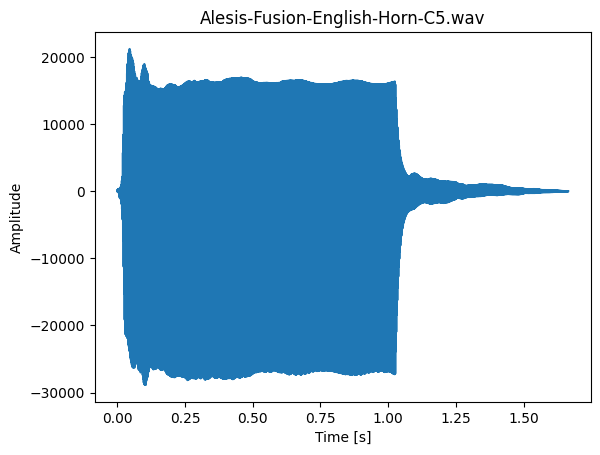

In [3]:
plt.plot(time, data[:, 0]) 
plt.xlabel('Time [s]') 
plt.ylabel('Amplitude') 
plt.title('Alesis-Fusion-English-Horn-C5.wav')
plt.show()

In [4]:
sd.play(data[:, 0], samplerate) 
sd.wait()

<sounddevice.CallbackFlags: output underflow>

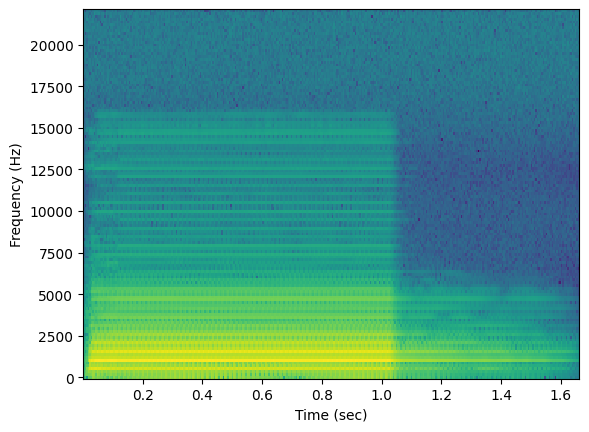

In [5]:
adata = data[:, 0] 
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s) 
lspg = np.log(spgram) 
plt.pcolormesh(tm,fr,lspg,shading='auto') 
plt.ylabel('Frequency (Hz)') 
plt.xlabel('Time (sec)')
plt.show()

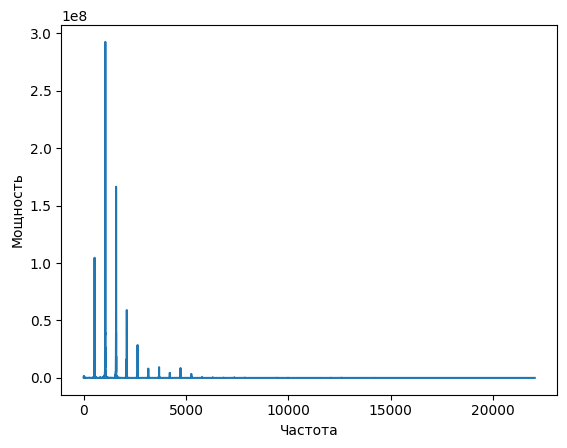

In [6]:
from scipy.fft import rfft, rfftfreq

N = int(samplerate * duration)
yf = rfft(data[:, 0]) 
xf = rfftfreq(N, 1 / samplerate)
plt.plot(xf, np.abs(yf)) 
plt.xlabel('Частота') 
plt.ylabel('Мощность')
plt.show()

In [7]:
def H(m, k, f):
    val = 1.15*np.exp(-(k-f[m])**2 / (2*np.power((f[m+1]-f[m-1])*0.4, 2))) - 0.15
    return val if val > 0 else 0.0

def MinMax(m, f):
    mid = 0.4*(f[m+1]-f[m-1])*np.sqrt(-2*np.log(0.15/1.15))
    return -mid+f[m], mid+f[m]

In [8]:
M = 20
filters = [b*b*40 + 100 for b in range(M)]
minmax = [MinMax(m, filters) for m in range(1, M-1)]

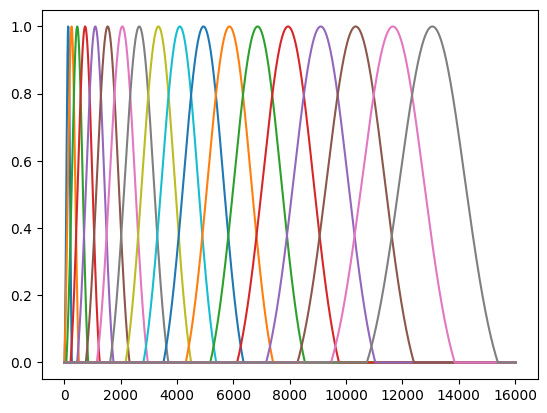

In [9]:
for i in range(1, M-1):
    plt.plot([H(i, n, filters) for n in range(16000)])

In [10]:
def B_inv(b):
    return 700*(np.exp(b/1125) - 1)

def B(f):
    return 1125*np.log(1 + f/700)

In [16]:
def f(m):
    return (N / samplerate) * B_inv(B(minmax[m][0]) + m*(B(minmax[m][1]) - B(minmax[m][0]))/(M+1))


def S(m, rfft, filters):
    sum = 0
    for k in range(N//2):
        sum += rfft[k]**2 * H(m, k, filters)
    return np.log(sum)
    

def C(m, filters, d):
    sum = 0.0
    rfftx = rfft(d)
    for mm in range(M-1):
        sum += S(mm, rfftx, filters)*np.cos(np.pi*m*(mm+0.5)/M)

In [18]:
# [C(m, filters, adata) for m in range(M)]
S(1, rfft(adata), filters)

(24.4875967442949-2.281239834713114j)